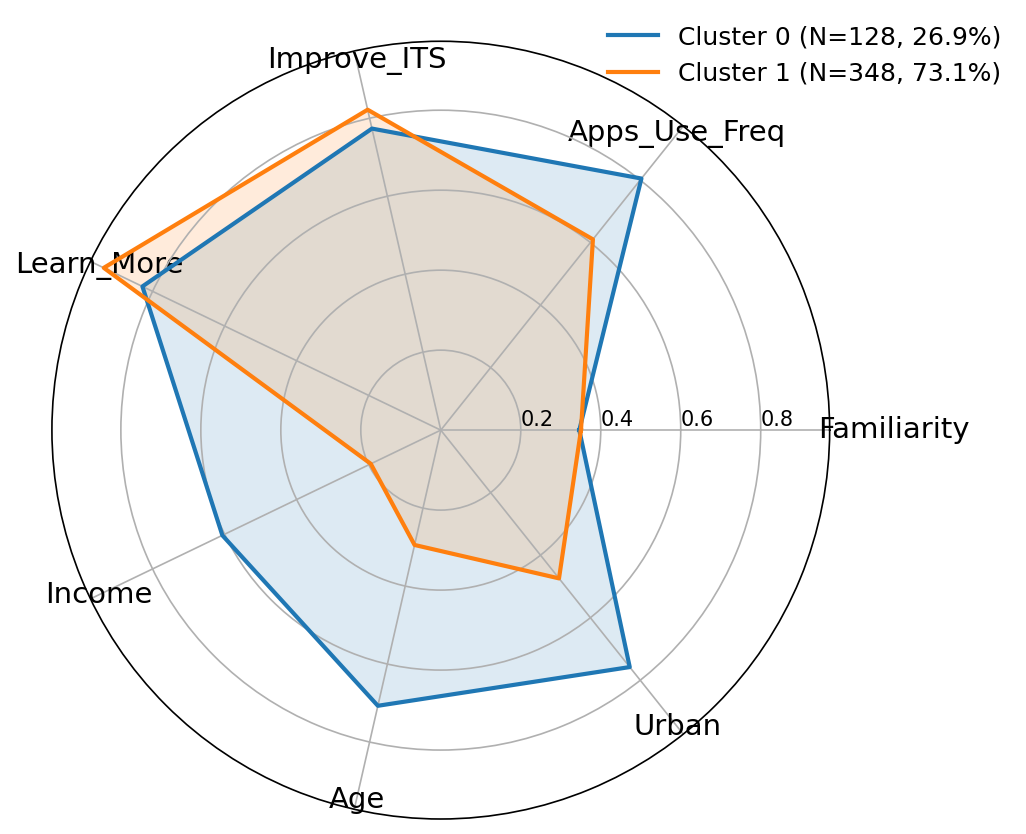

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_excel(r"F:\博士\ITS Ghana\ITS_Survey_Cleaned_Numeric.xlsx")


if "UseYes" not in df.columns and "Would_Use_ITS" in df.columns:
    df["UseYes"] = (df["Would_Use_ITS"] == 3).astype(int)

if "Gender" in df.columns:
    df["Gender3"] = df["Gender"].map(lambda x: 1 if x == 1 else (2 if x == 2 else 3))

if "Current_Live" in df.columns and "Urban" not in df.columns:
    df["Urban"] = (df["Current_Live"] == 3).astype(int)



feat = [v for v in ["Familiarity","Apps_Use_Freq","Improve_ITS",
                    "Learn_More","Income","Age","Urban"] 
        if v in df.columns]

seg = df[feat].dropna()  

if len(seg) >= 60:
    
    X = StandardScaler().fit_transform(seg.values)

    
    best_k, best_sc, best_model = None, -1, None
    for k in [2, 3, 4, 5]:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        sc = silhouette_score(X, labels)
        if sc > best_sc:
            best_k, best_sc, best_model = k, sc, km

   
    labs = best_model.fit_predict(X)
    seg_c = seg.copy()
    seg_c["cluster"] = labs

    prof = seg_c.groupby("cluster").mean()
    counts = seg_c["cluster"].value_counts().sort_index()
    pct = (counts / counts.sum() * 100).round(1)

    
    vals = (prof - seg[feat].min()) / (seg[feat].max() - seg[feat].min())
    angles = np.linspace(0, 2*np.pi, len(feat), endpoint=False).tolist()
    angles += angles[:1]

    fig = plt.figure(figsize=(6.8, 6.8))
    ax = fig.add_subplot(111, polar=True)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feat, fontsize=14)

    for label, angle in zip(ax.get_xticklabels(), angles):
        x, y = label.get_position()
        if -0.1 < angle < 0.4:
            label.set_position((x, y - 0.09))
        elif 2.6 < angle < 3.7:
            label.set_position((x, y + 0.10))
        else:
            label.set_position((x, y + 0.10))

    ax.set_rlabel_position(0)

    for i in range(len(vals)):
        y = vals.iloc[i].tolist()
        y += y[:1]
        ax.plot(angles, y, linewidth=2.0,
                label=f"Cluster {i} (N={counts[i]}, {pct[i]}%)")
        ax.fill(angles, y, alpha=0.15)

    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05),
              frameon=False, fontsize=12)

    plt.tight_layout()
    plt.show()


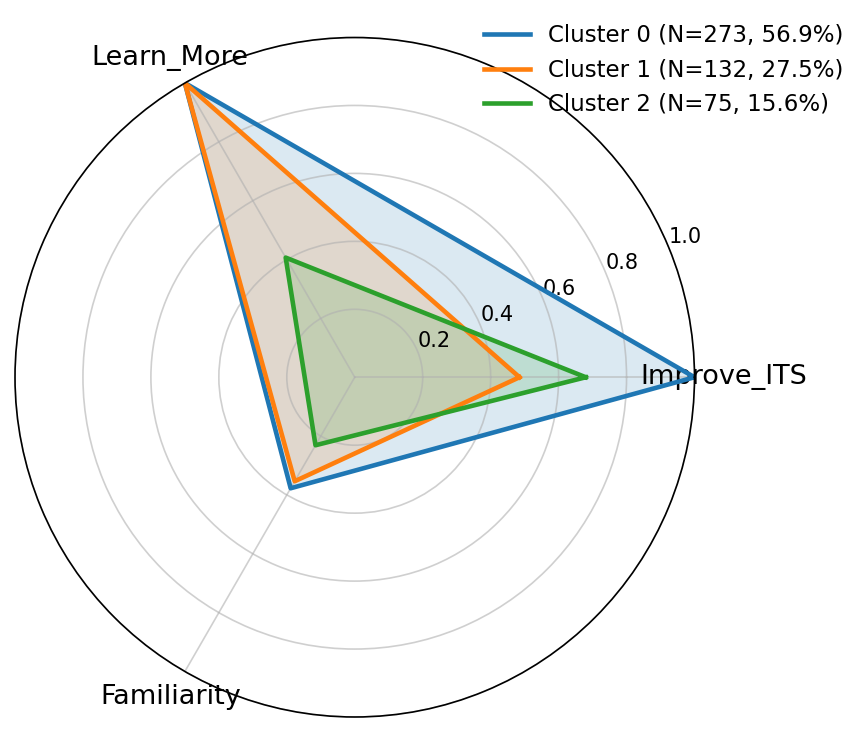

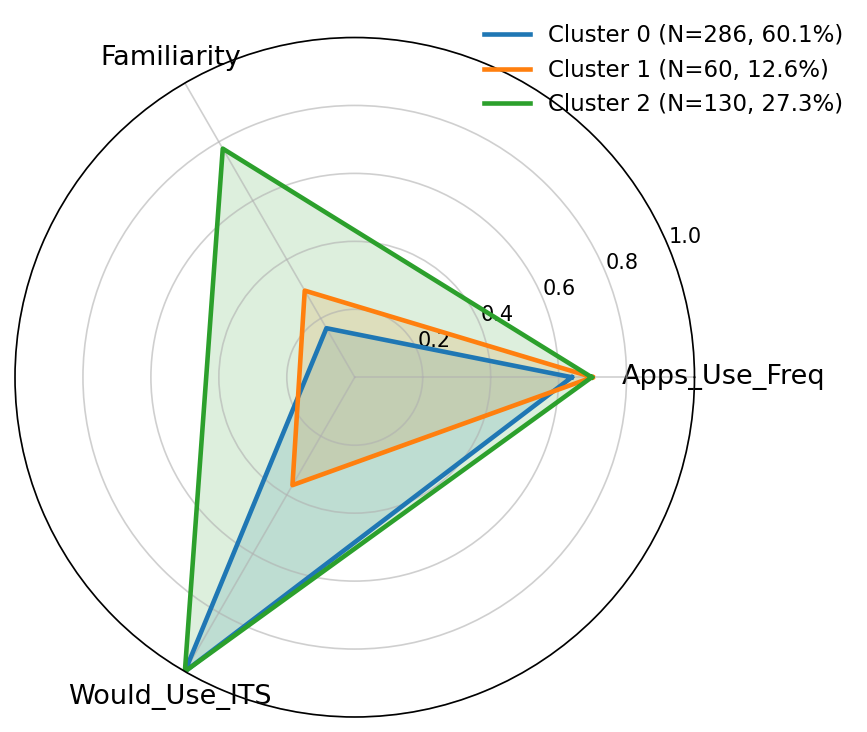

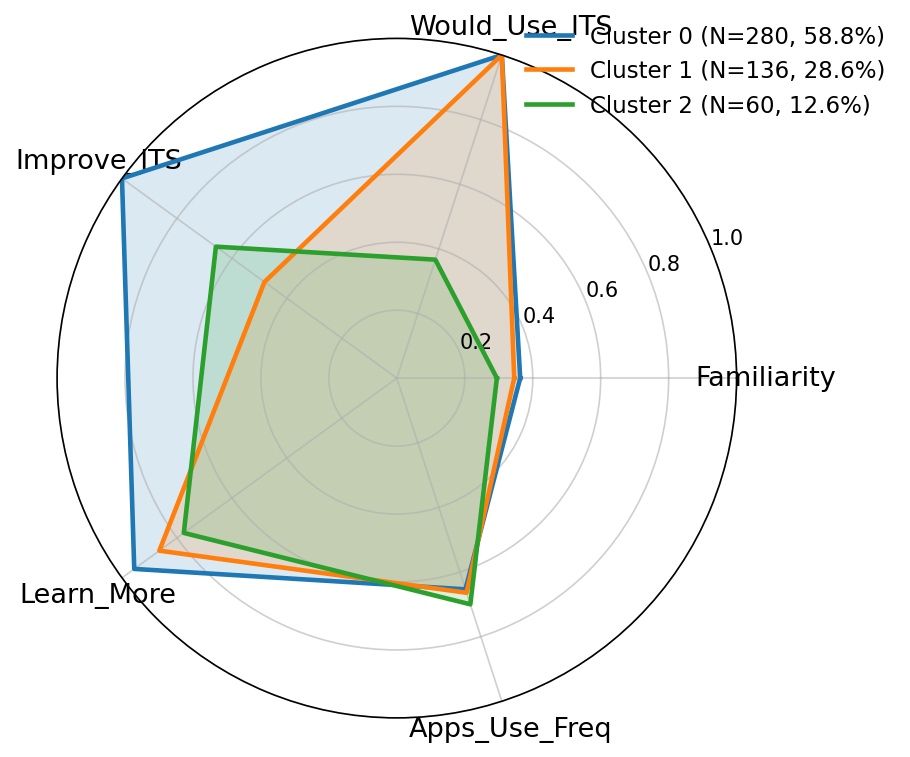

In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 150  


var_sets = {
    "Attitudes": ["Improve_ITS", "Learn_More", "Familiarity"],
    "TechUsage": ["Apps_Use_Freq", "Familiarity", "Would_Use_ITS"],
    "AdoptionReadiness": ["Familiarity", "Would_Use_ITS", "Improve_ITS", "Learn_More", "Apps_Use_Freq"]
}



def radar_plot(df, features, title):
    sub = df[features].dropna()
    X = StandardScaler().fit_transform(sub.values)

    
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

   
    prof = sub.copy()
    prof["cluster"] = labels
    means = prof.groupby("cluster").mean()

    
    counts = prof["cluster"].value_counts().sort_index()
    pct = (counts / counts.sum() * 100).round(1)

    
    vals = (means - sub.min()) / (sub.max() - sub.min())
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]

    
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
    plt.subplots_adjust(right=0.80)

    
    for i in range(len(vals)):
        y = vals.iloc[i].tolist()
        y += y[:1]
        ax.plot(angles, y, linewidth=2.2,
                label=f"Cluster {i} (N={counts[i]}, {pct[i]}%)")
        ax.fill(angles, y, alpha=0.16)

    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=13)

    ax.set_ylim(0, 1)
    ax.grid(alpha=0.6)

   
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05),
              fontsize=11, frameon=False)

    
    plt.show()



for name, feat_list in var_sets.items():
    radar_plot(df, feat_list, title=f"{name} Clusters")


,Familiarity,UseYes,Improve_ITS,Learn_More,Gender,Age,Income,Current_Live,Grew_Up
Familiarity,1.000,0.079,0.072,0.129,0.106,0.108,0.122,0.087,0.124
UseYes,0.079,1.000,0.235,0.222,0.158,0.225,0.090,0.086,0.095
Improve_ITS,0.072,0.235,1.000,0.158,0.089,0.099,0.073,0.041,0.041
Learn_More,0.129,0.222,0.158,1.000,0.108,0.294,0.246,0.129,0.114
Gender,0.106,0.158,0.089,0.108,1.000,0.288,0.168,0.235,0.187
Age,0.108,0.225,0.099,0.294,0.288,1.000,0.404,0.232,0.242
Income,0.122,0.090,0.073,0.246,0.168,0.404,1.000,0.194,0.162
Current_Live,0.087,0.086,0.041,0.129,0.235,0.232,0.194,1.000,0.423
Grew_Up,0.124,0.095,0.041,0.114,0.187,0.242,0.162,0.423,1.000


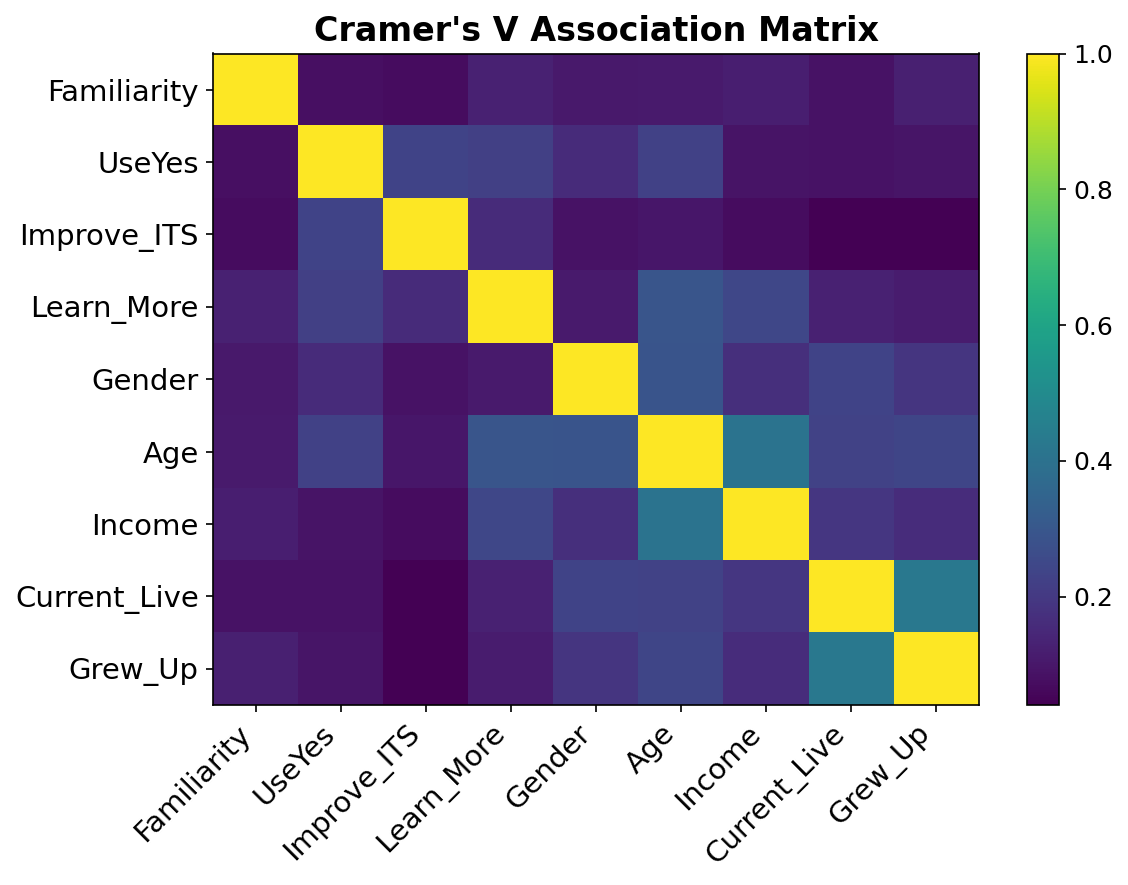

In [17]:


from scipy.stats import chi2_contingency   

# ---- Cramer's V function ----
def cramers_v(ctab):
    chi2, p, dof, _ = chi2_contingency(ctab)
    n = ctab.values.sum()
    r, k = ctab.shape
    return np.sqrt(chi2 / (n * max(1, min(k-1, r-1))))

# ---- Variables to include ----
cat_vars = [
    v for v in [
        "Familiarity","UseYes","Improve_ITS","Learn_More",
        "Gender3","Age","Income","Current_Live","Grew_Up"
    ] 
    if v in df.columns
]


label_map = {v: v for v in cat_vars}
if "Gender3" in label_map:
    label_map["Gender3"] = "Gender"

# ---- Compute Cramer's V Matrix ----
k = len(cat_vars)
M = np.zeros((k, k))

for i, a in enumerate(cat_vars):
    for j, b in enumerate(cat_vars):
        if i == j:
            M[i, j] = 1.0
        else:
            sub = df[[a, b]].dropna()
            if len(sub) == 0:
                M[i, j] = np.nan
            else:
                M[i, j] = cramers_v(pd.crosstab(sub[a], sub[b]))

# ---- Output Full Table ----
cv_table = pd.DataFrame(
    M,
    index=[label_map[v] for v in cat_vars],
    columns=[label_map[v] for v in cat_vars]
).round(3)

display(cv_table)

# ---- Plot Heatmap ----
plt.figure(figsize=(8, 6))
plt.imshow(M, aspect="auto", cmap="viridis")

plt.xticks(
    range(k),
    [label_map[v] for v in cat_vars],
    rotation=45, ha="right", fontsize=14
)
plt.yticks(
    range(k),
    [label_map[v] for v in cat_vars],
    fontsize=14
)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)

plt.title("Cramer's V Association Matrix", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


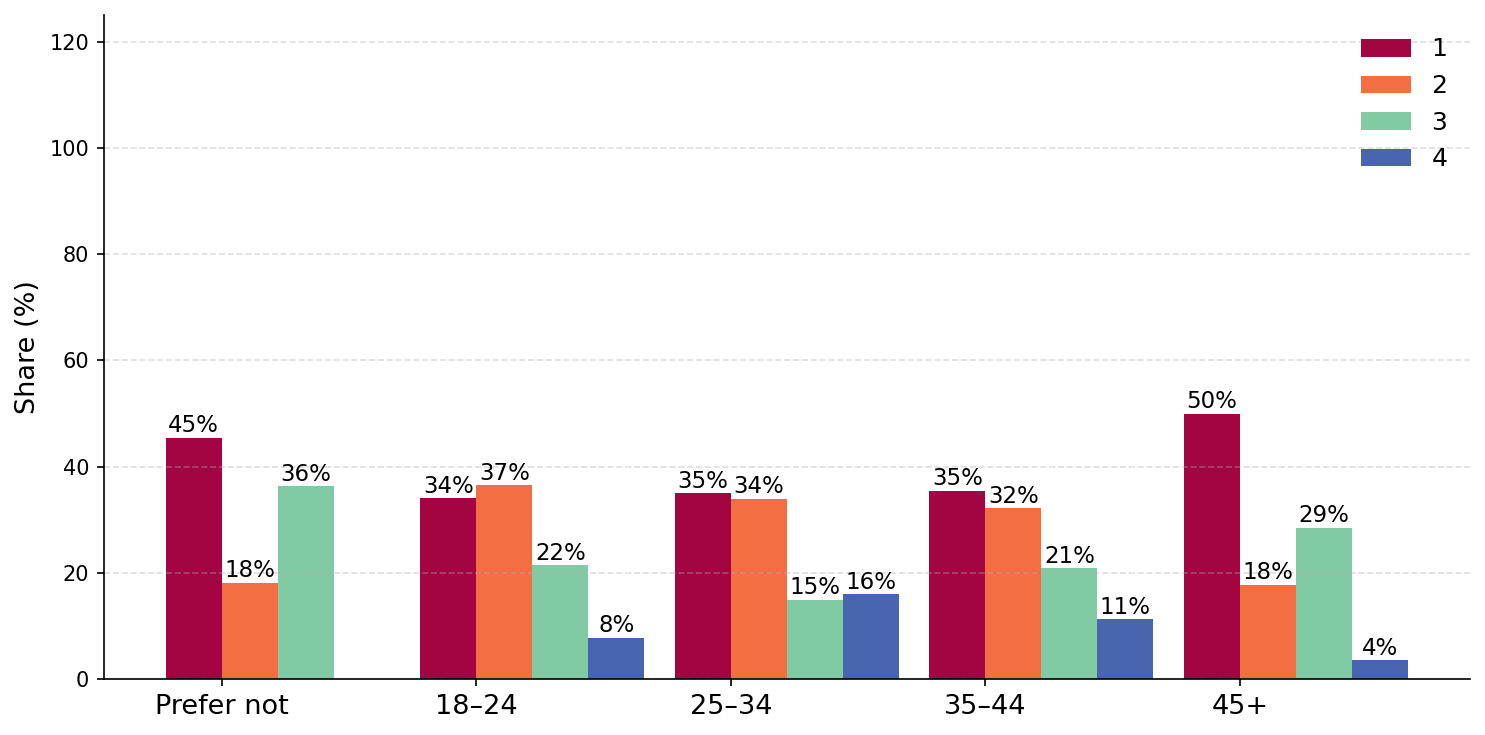

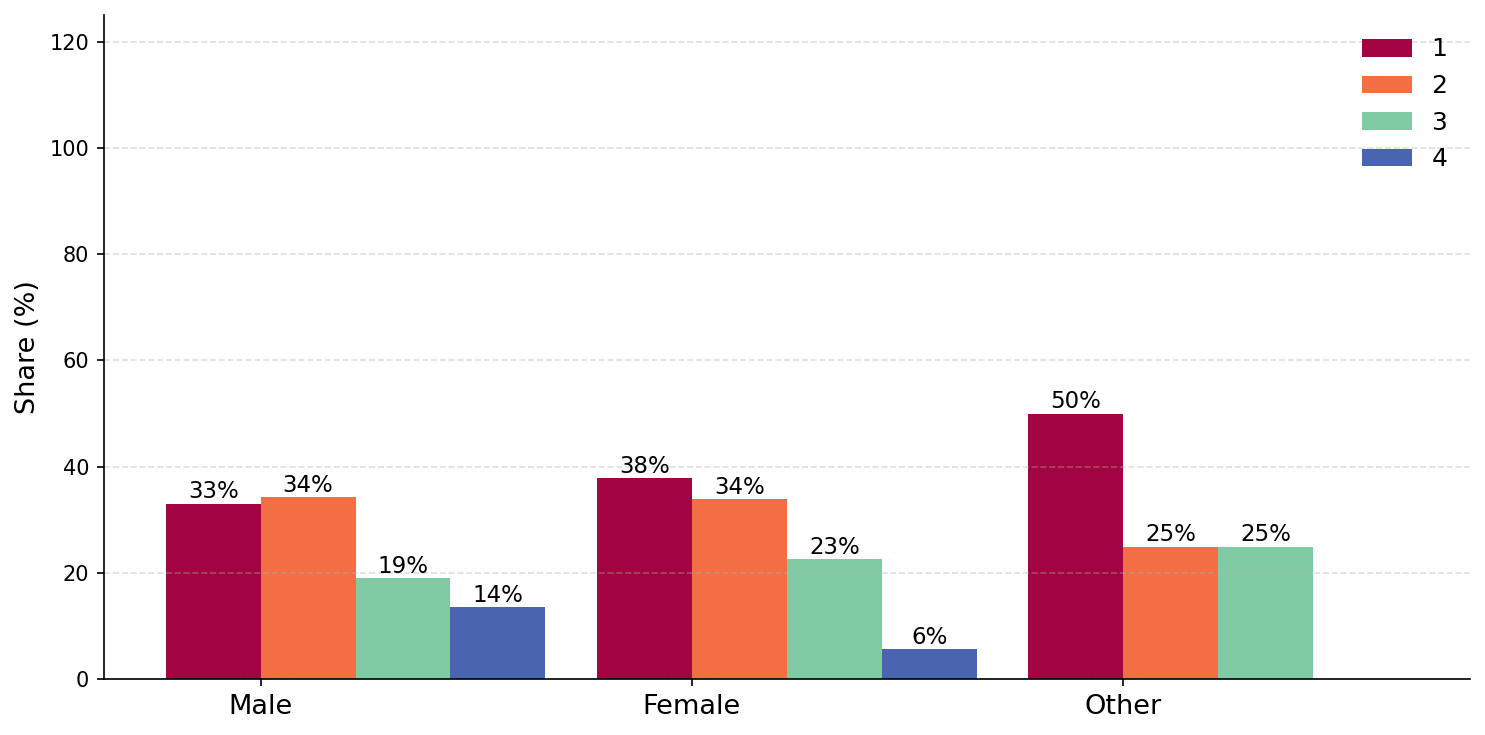

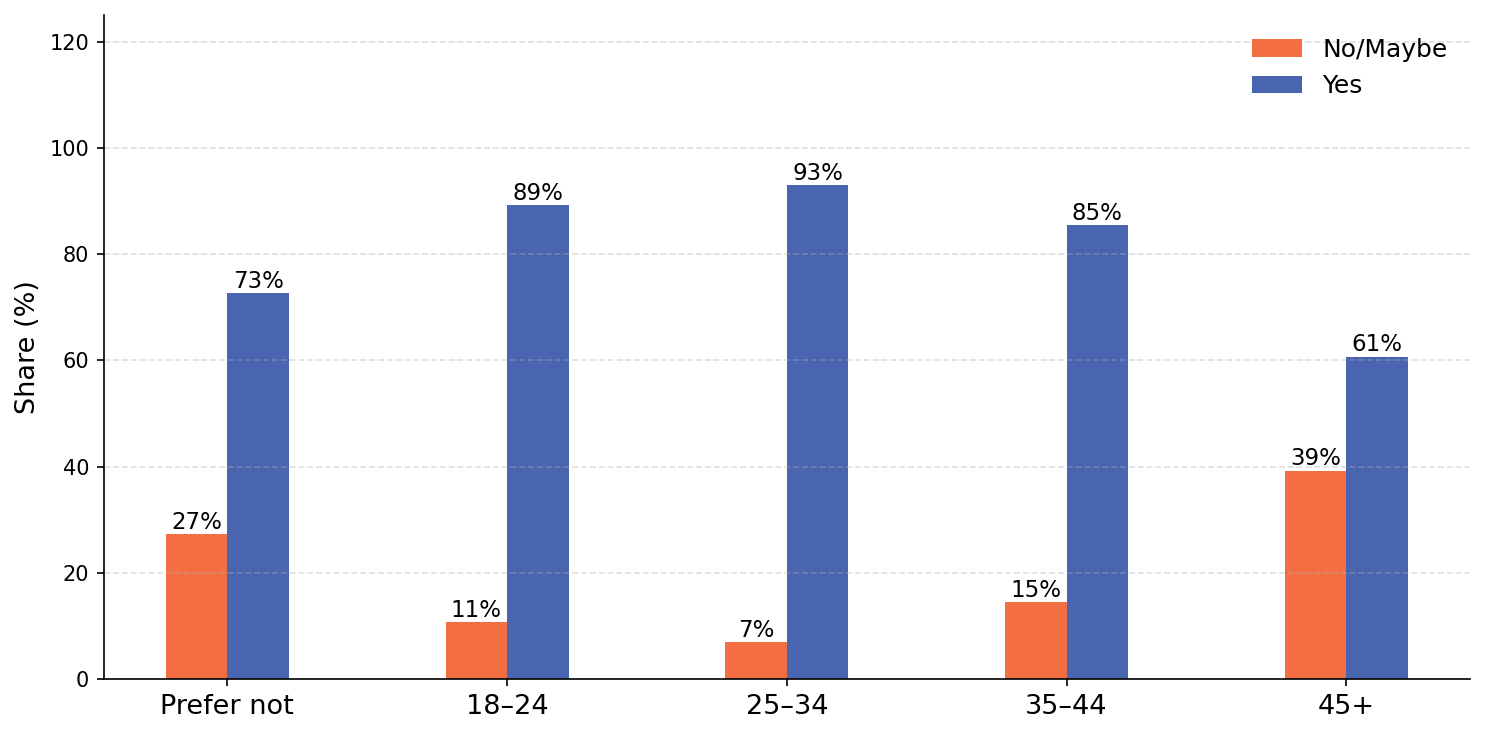

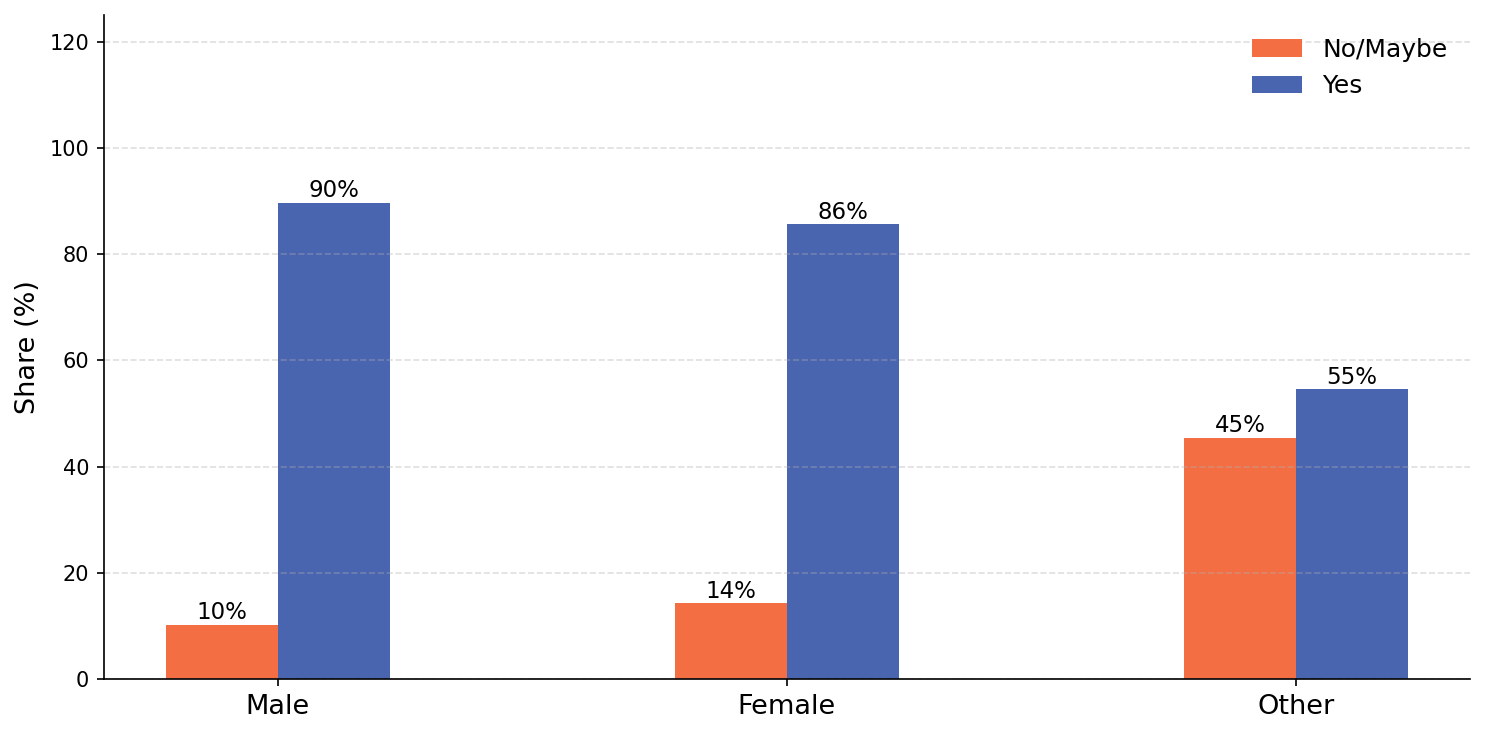

In [23]:
# ===============================
# FINAL — 4 REQUIRED PLOTS ONLY
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150

# -----------------------------
# Colors
# -----------------------------
PALETTE_FAM = {1:"#a30543", 2:"#f36f43", 3:"#80cba4", 4:"#4965b0"}
PALETTE_BIN = {0:"#f36f43", 1:"#4965b0"}

# -----------------------------
# Labels
# -----------------------------
label_maps = {
    "Age": {0.0:"Prefer not", 1.0:"18–24", 2.0:"25–34", 3.0:"35–44", 4.0:"45+"},
    "Gender3": {1:"Male", 2:"Female", 3:"Other"},
    "Familiarity": {1:"1", 2:"2", 3:"3", 4:"4"},
    "UseYes": {0:"No/Maybe", 1:"Yes"},
}

category_orders = {
    "Age": [0.0,1.0,2.0,3.0,4.0],
    "Gender3": [1,2,3],
    "Familiarity": [1,2,3,4],
    "UseYes": [0,1]
}

# ---------------------------------------------
# Ensure full categories exist (avoid missing bars)
# ---------------------------------------------
def ensure_full(tab, vals):
    for v in vals:
        if v not in tab.index:
            tab.loc[v] = 0
    return tab.loc[vals]

# ---------------------------------------------
# FUNCTION — grouped % bar plot (right-side style)
# ---------------------------------------------
def grouped_bar(df, group_var, target_var, palette):
    sub = df[[group_var, target_var]].dropna()

    ct = pd.crosstab(sub[group_var], sub[target_var])

    g_levels = category_orders[group_var]
    t_levels = category_orders[target_var]

    ct = ensure_full(ct, g_levels)
    for lv in t_levels:
        if lv not in ct.columns:
            ct[lv] = 0
    ct = ct[t_levels]

    prop = ct.div(ct.sum(axis=1), axis=0) * 100

    x_labels = [label_maps[group_var][v] for v in g_levels]
    legend_labels = [label_maps[target_var][v] for v in t_levels]

    x = np.arange(len(g_levels))
    width = 0.22

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, lv in enumerate(t_levels):
        y = prop[lv].values
        ax.bar(x + (i-0.5)*width, y, width,
               color=palette[lv], label=legend_labels[i])

        for j, v in enumerate(y):
            if v > 3:
                ax.text(x[j] + (i-0.5)*width, v + 1,
                        f"{v:.0f}%", ha="center", fontsize=11)

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=0, ha="center", fontsize=13)
    ax.tick_params(axis="x", labelsize=13)
 
    

    ax.set_ylabel("Share (%)", fontsize=13)
    ax.set_ylim(0, 125)
    ax.legend(frameon=False, fontsize=12)

    ax.yaxis.grid(True, linestyle="--", alpha=0.4)
    for spine in ("top","right"):
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()


# Familiarity × Age
grouped_bar(df, "Age", "Familiarity", PALETTE_FAM)

# Familiarity × Gender
grouped_bar(df, "Gender3", "Familiarity", PALETTE_FAM)

# UseYes × Age
grouped_bar(df, "Age", "UseYes", PALETTE_BIN)

# UseYes × Gender
grouped_bar(df, "Gender3", "UseYes", PALETTE_BIN)

